In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#-------------(read dataset and fix the index)----------------------------------------
df= pd.read_csv ("C:/Users/Asus/Desktop/Forecasting-covid-cases-MLDL/total-data-france-2022-01-16-19h09.csv")
df['date']=pd.to_datetime(df['date']).dt.date
df.set_index('date',inplace=True)

In [30]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 725 entries, 2020-01-23 to 2022-01-16
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tx_pos        605 non-null    float64
 1   tx_incid      605 non-null    float64
 2   TO            670 non-null    float64
 3   R             587 non-null    float64
 4   rea           670 non-null    float64
 5   hosp          670 non-null    float64
 6   rad           670 non-null    float64
 7   dchosp        670 non-null    float64
 8   incid_rea     669 non-null    float64
 9   incid_hosp    669 non-null    float64
 10  incid_rad     669 non-null    float64
 11  incid_dchosp  669 non-null    float64
 12  conf          725 non-null    int64  
 13  conf_j1       431 non-null    float64
 14  pos           611 non-null    float64
 15  esms_dc       346 non-null    float64
 16  dc_tot        346 non-null    float64
 17  pos_7j        605 non-null    float64
 18  cv_dose1      1 non

,tx_pos,tx_incid,TO,R,rea,hosp,rad,dchosp,incid_rea,incid_hosp,incid_rad,incid_dchosp,conf,conf_j1,pos,esms_dc,dc_tot,pos_7j,cv_dose1,esms_cas
date,,,,,,,,,,,,,,,,,,,,
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,20.078134,2884.023161,0.787861,NaN,3985.0,23889.0,478097.0,99093.0,381.0,2806.0,1995.0,249.0,12934982,361719.0,337494.0,27212.0,126305.0,1935612.0,NaN,231490.0
2022-01-13,21.308011,2923.206654,0.778766,NaN,3939.0,24154.0,480068.0,99318.0,334.0,2513.0,1990.0,227.0,13240304,305322.0,311826.0,27212.0,126530.0,1961910.0,79.7,231490.0
2022-01-14,NaN,NaN,0.770067,NaN,3895.0,24511.0,481964.0,99509.0,310.0,2486.0,1938.0,196.0,13569675,329371.0,NaN,27212.0,126721.0,NaN,NaN,231490.0


In [31]:
#check for any missing dates in the index
print(pd.date_range(start="2020-03-18", end="2022-01-16").difference(df.index))

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


array([[<AxesSubplot:title={'center':'tx_pos'}>,
        <AxesSubplot:title={'center':'tx_incid'}>,
        <AxesSubplot:title={'center':'TO'}>,
        <AxesSubplot:title={'center':'R'}>],
       [<AxesSubplot:title={'center':'rea'}>,
        <AxesSubplot:title={'center':'hosp'}>,
        <AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'dchosp'}>],
       [<AxesSubplot:title={'center':'incid_rea'}>,
        <AxesSubplot:title={'center':'incid_hosp'}>,
        <AxesSubplot:title={'center':'incid_rad'}>,
        <AxesSubplot:title={'center':'incid_dchosp'}>],
       [<AxesSubplot:title={'center':'conf'}>,
        <AxesSubplot:title={'center':'conf_j1'}>,
        <AxesSubplot:title={'center':'pos'}>,
        <AxesSubplot:title={'center':'esms_dc'}>],
       [<AxesSubplot:title={'center':'dc_tot'}>,
        <AxesSubplot:title={'center':'pos_7j'}>,
        <AxesSubplot:title={'center':'cv_dose1'}>,
        <AxesSubplot:title={'center':'esms_cas'}>]], dtype=object

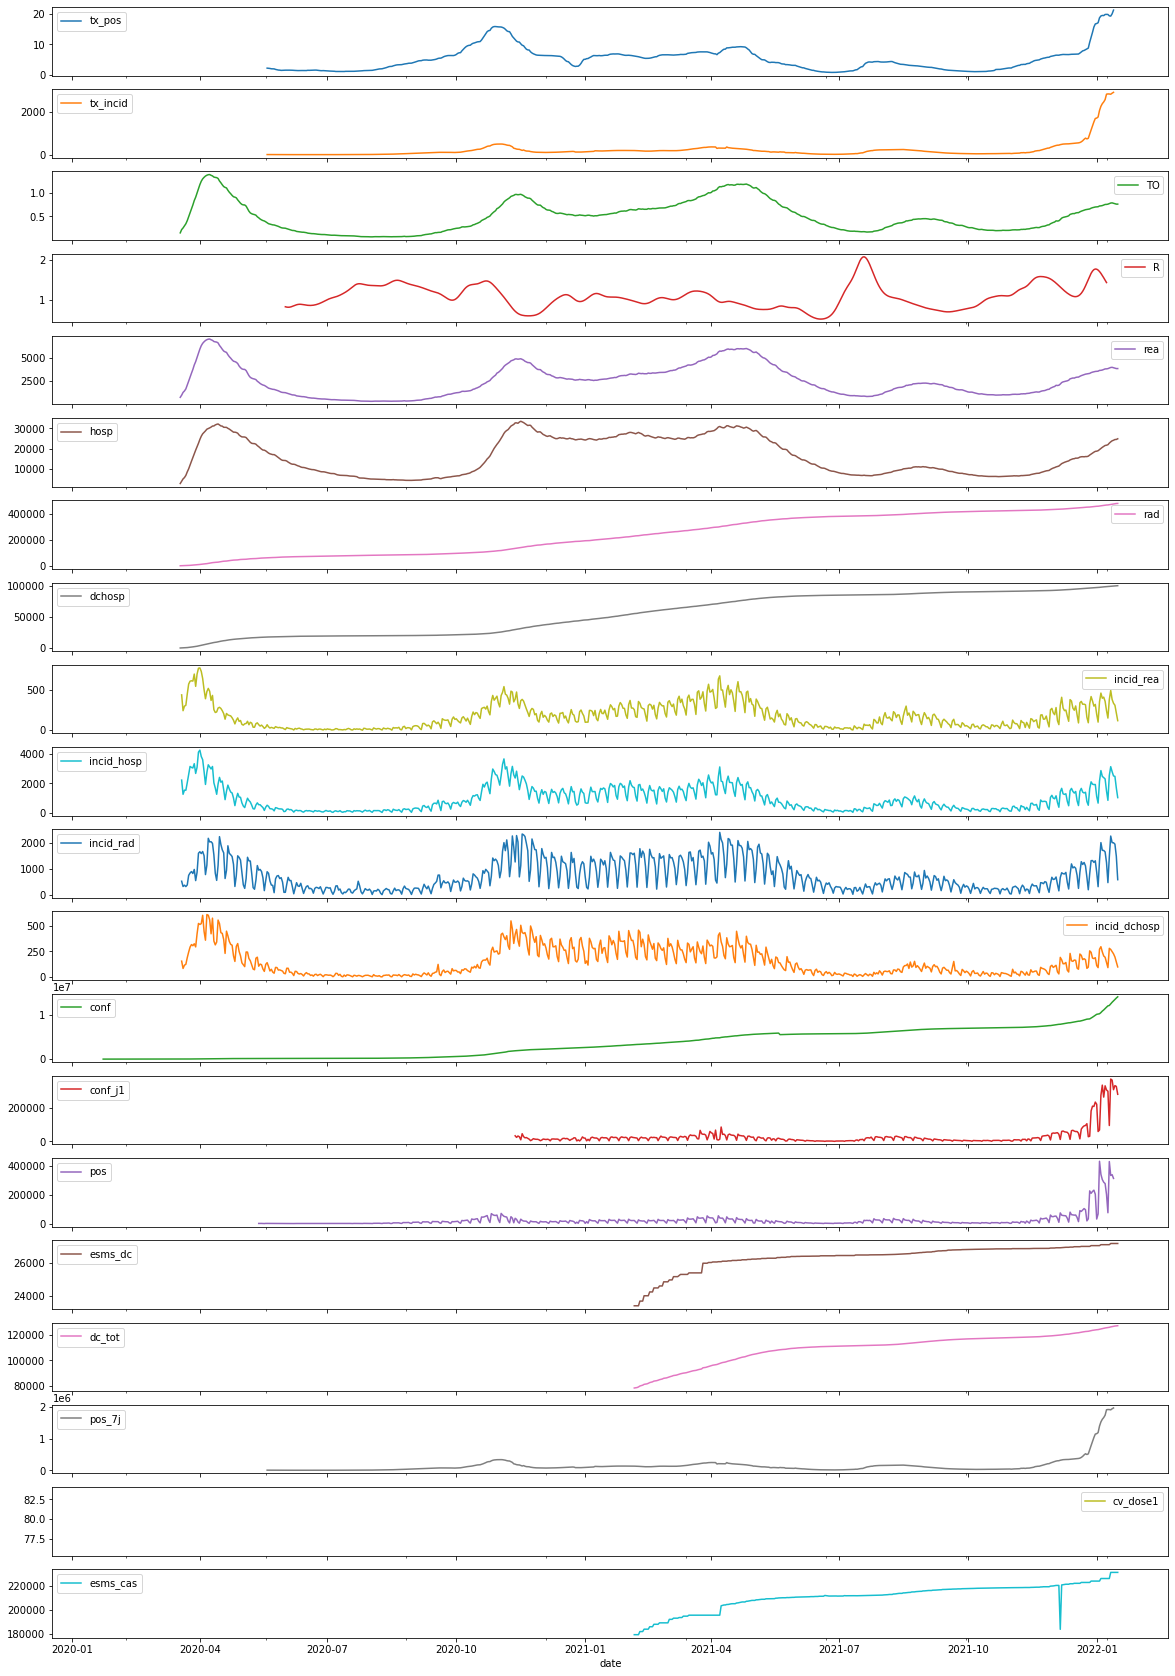

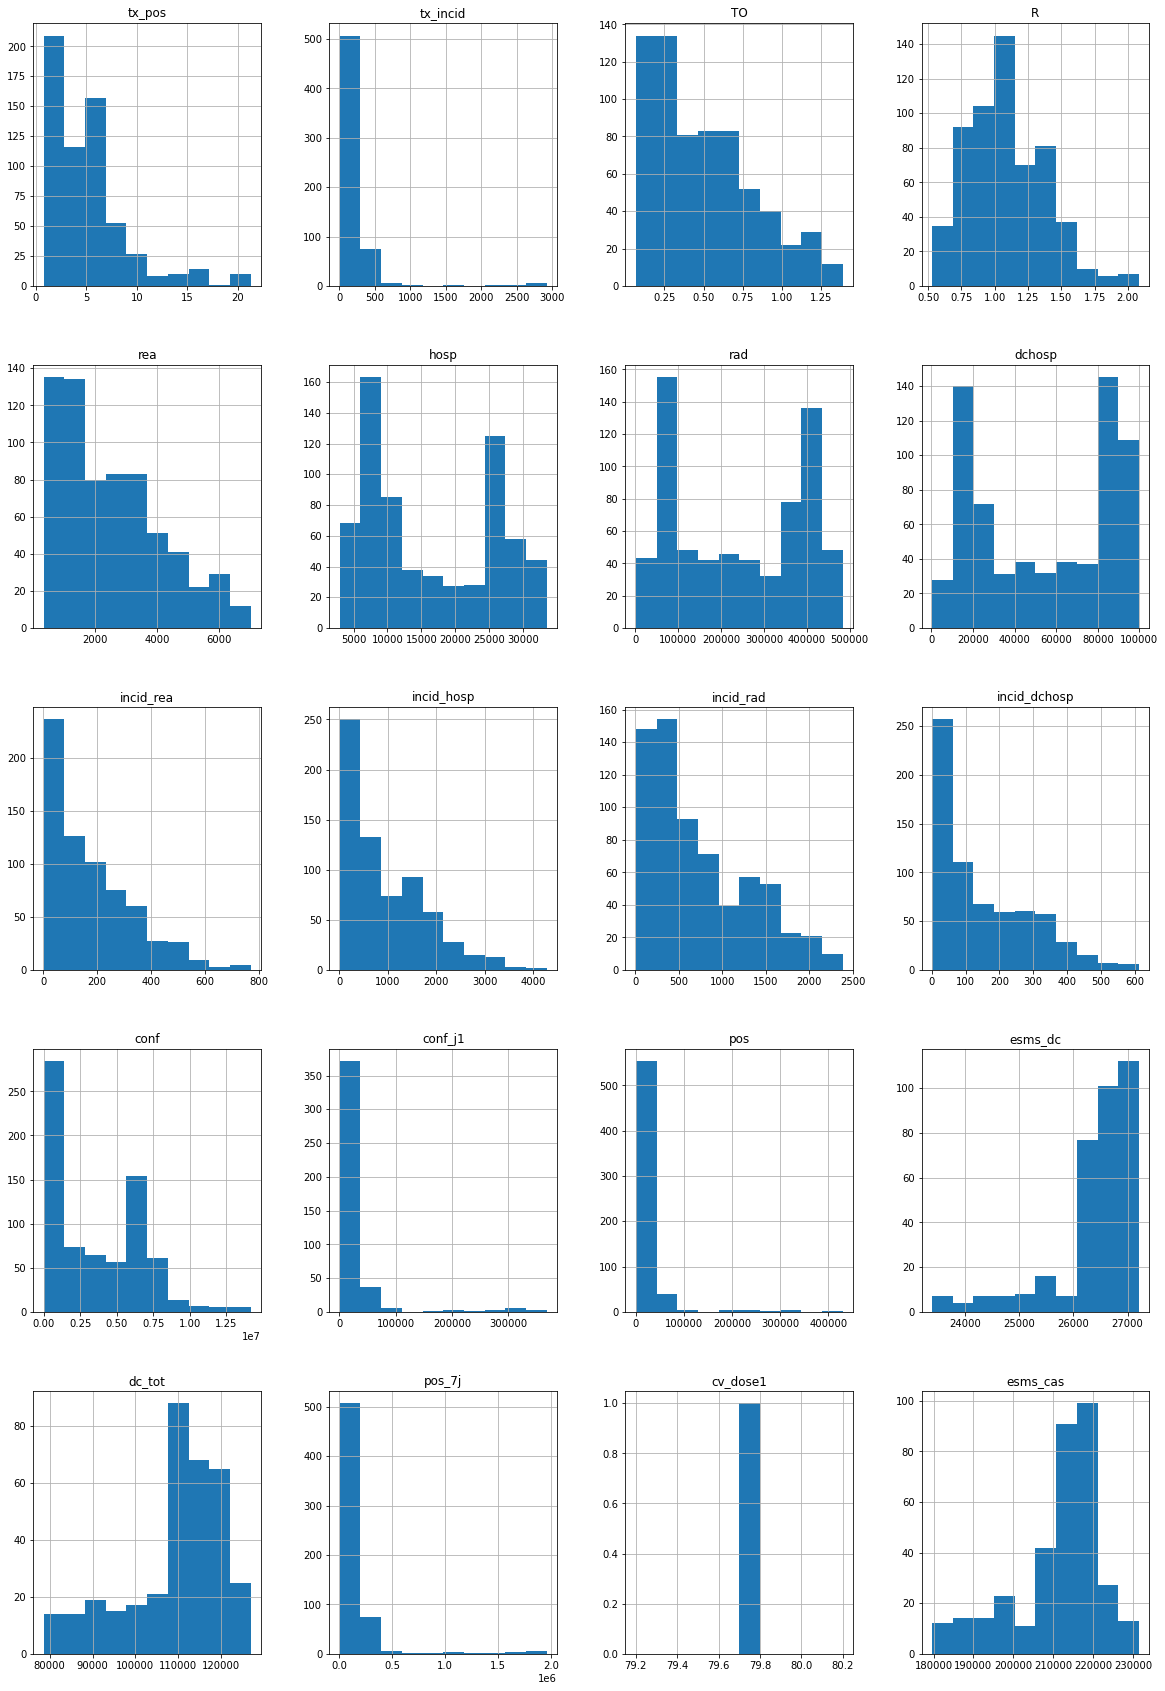

In [32]:
#plot all columns
df.plot(subplots=True,figsize=(20,30))
df.hist(figsize=(20,30))

In [33]:
#check missing value
df.isnull().sum()

tx_pos          120
tx_incid        120
TO               55
R               138
rea              55
hosp             55
rad              55
dchosp           55
incid_rea        56
incid_hosp       56
incid_rad        56
incid_dchosp     56
conf              0
conf_j1         294
pos             114
esms_dc         379
dc_tot          379
pos_7j          120
cv_dose1        724
esms_cas        379
dtype: int64

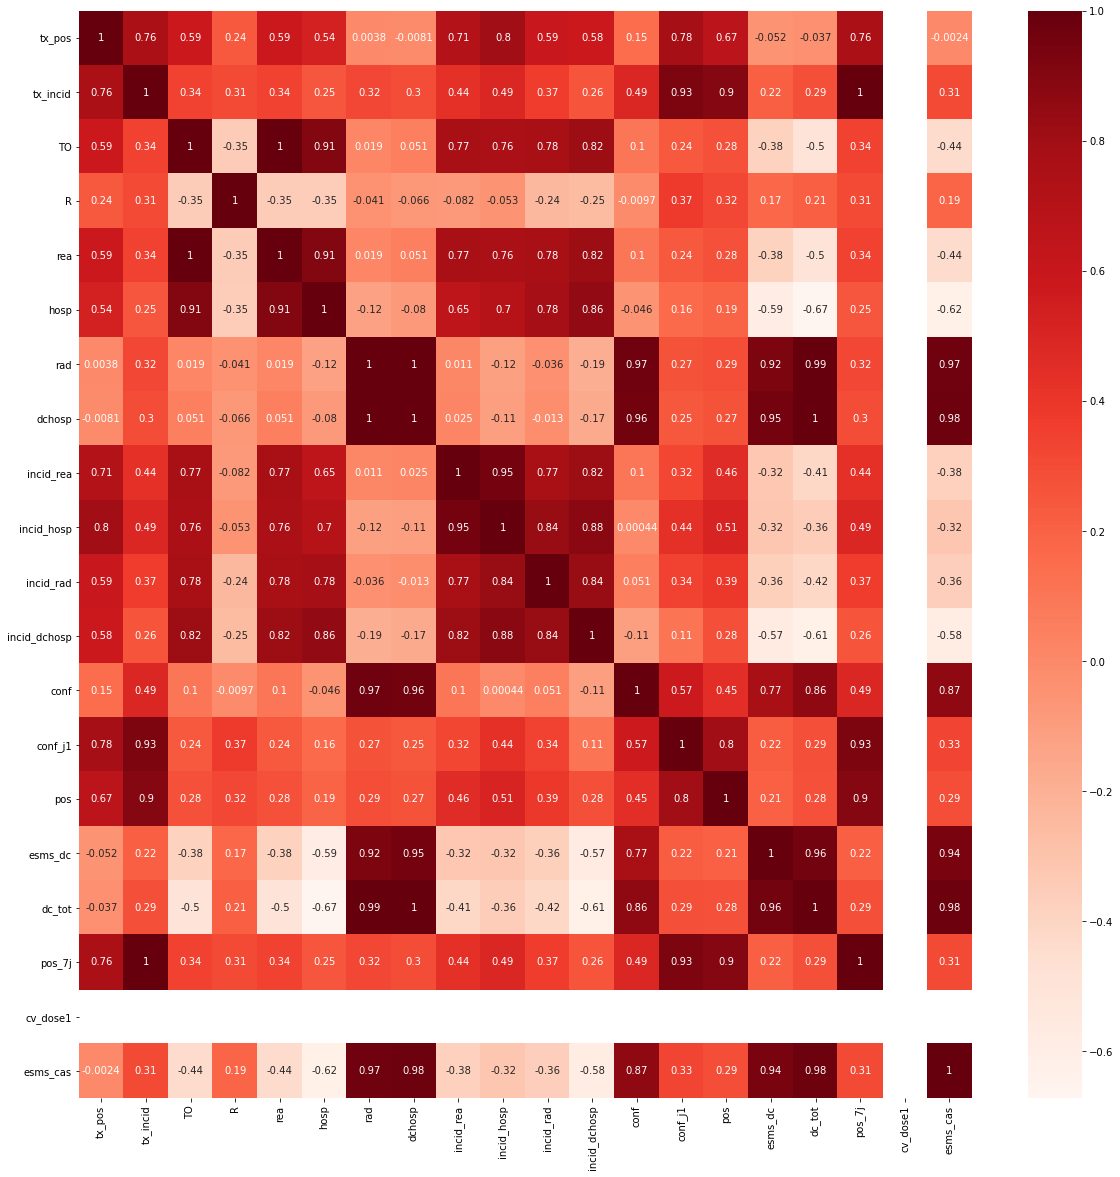

In [34]:
#---------------------------(Data cleaning)------------------------------------------------------------
#----------------------------(Correlation)-------------------------------------------------------------
cor=df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [37]:
#drop columns and rows aren't useful
df.drop(pd.date_range(start="23-01-2020",end= "17-03-2020"),inplace=True)
df.drop(["cv_dose1","R","esms_cas","dc_tot","esms_dc"],axis=1,inplace=True)


In [38]:
df

,tx_pos,tx_incid,TO,rea,hosp,rad,dchosp,incid_rea,incid_hosp,incid_rad,incid_dchosp,conf,conf_j1,pos,pos_7j
date,,,,,,,,,,,,,,,
2020-03-18,NaN,NaN,0.152432,771.0,2972.0,816.0,218.0,NaN,NaN,NaN,NaN,9134,NaN,NaN,NaN
2020-03-19,NaN,NaN,0.221827,1002.0,4073.0,1180.0,327.0,438.0,2229.0,519.0,155.0,10995,NaN,NaN,NaN
2020-03-20,NaN,NaN,0.256425,1297.0,5226.0,1587.0,450.0,242.0,1256.0,317.0,83.0,12612,NaN,NaN,NaN
2020-03-21,NaN,NaN,0.301503,1453.0,5900.0,1811.0,525.0,298.0,1540.0,368.0,115.0,14459,NaN,NaN,NaN
2020-03-22,NaN,NaN,0.345196,1674.0,6954.0,2117.0,632.0,309.0,1534.0,315.0,124.0,16686,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,20.078134,2884.023161,0.787861,3985.0,23889.0,478097.0,99093.0,381.0,2806.0,1995.0,249.0,12934982,361719.0,337494.0,1935612.0
2022-01-13,21.308011,2923.206654,0.778766,3939.0,24154.0,480068.0,99318.0,334.0,2513.0,1990.0,227.0,13240304,305322.0,311826.0,1961910.0
2022-01-14,NaN,NaN,0.770067,3895.0,24511.0,481964.0,99509.0,310.0,2486.0,1938.0,196.0,13569675,329371.0,NaN,NaN


In [39]:
#Normalization for KNN to fill missing values
scaler = MinMaxScaler()
df= pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index=df.index)
#print('***Normal dataset with missing values***',df)
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns, index=df.index)
#print('***fill dataset with Knn***',df)
df= pd.DataFrame(scaler.inverse_transform(df), columns = df.columns, index=df.index)
df[['incid_rad','incid_dchosp','conf_j1','pos','pos_7j']] = df[['incid_rad','incid_dchosp','conf_j1','pos','pos_7j']].astype('int')

In [40]:
df

,tx_pos,tx_incid,TO,rea,hosp,rad,dchosp,incid_rea,incid_hosp,incid_rad,incid_dchosp,conf,conf_j1,pos,pos_7j
date,,,,,,,,,,,,,,,
2020-03-18,1.893215,17.117387,0.152432,771.0,2972.0,816.0,218.0,326.0,1675.0,401,117,9134.0,14996,1203,11488
2020-03-19,10.822692,243.487068,0.221827,1002.0,4073.0,1180.0,327.0,438.0,2229.0,519,155,10995.0,17125,35299,163416
2020-03-20,7.893361,147.765290,0.256425,1297.0,5226.0,1587.0,450.0,242.0,1256.0,317,83,12612.0,9141,22931,99172
2020-03-21,10.532885,229.603434,0.301503,1453.0,5900.0,1811.0,525.0,298.0,1540.0,368,115,14459.0,15247,32448,154098
2020-03-22,10.799278,243.787050,0.345196,1674.0,6954.0,2117.0,632.0,309.0,1534.0,315,123,16686.0,9524,36866,163617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,20.078134,2884.023161,0.787861,3985.0,23889.0,478097.0,99093.0,381.0,2806.0,1994,249,12934982.0,361719,337494,1935612
2022-01-13,21.308011,2923.206654,0.778766,3939.0,24154.0,480068.0,99318.0,334.0,2513.0,1990,227,13240304.0,305322,311826,1961910
2022-01-14,20.419455,2796.747086,0.770067,3895.0,24511.0,481964.0,99509.0,310.0,2486.0,1938,196,13569675.0,329371,308427,1877036


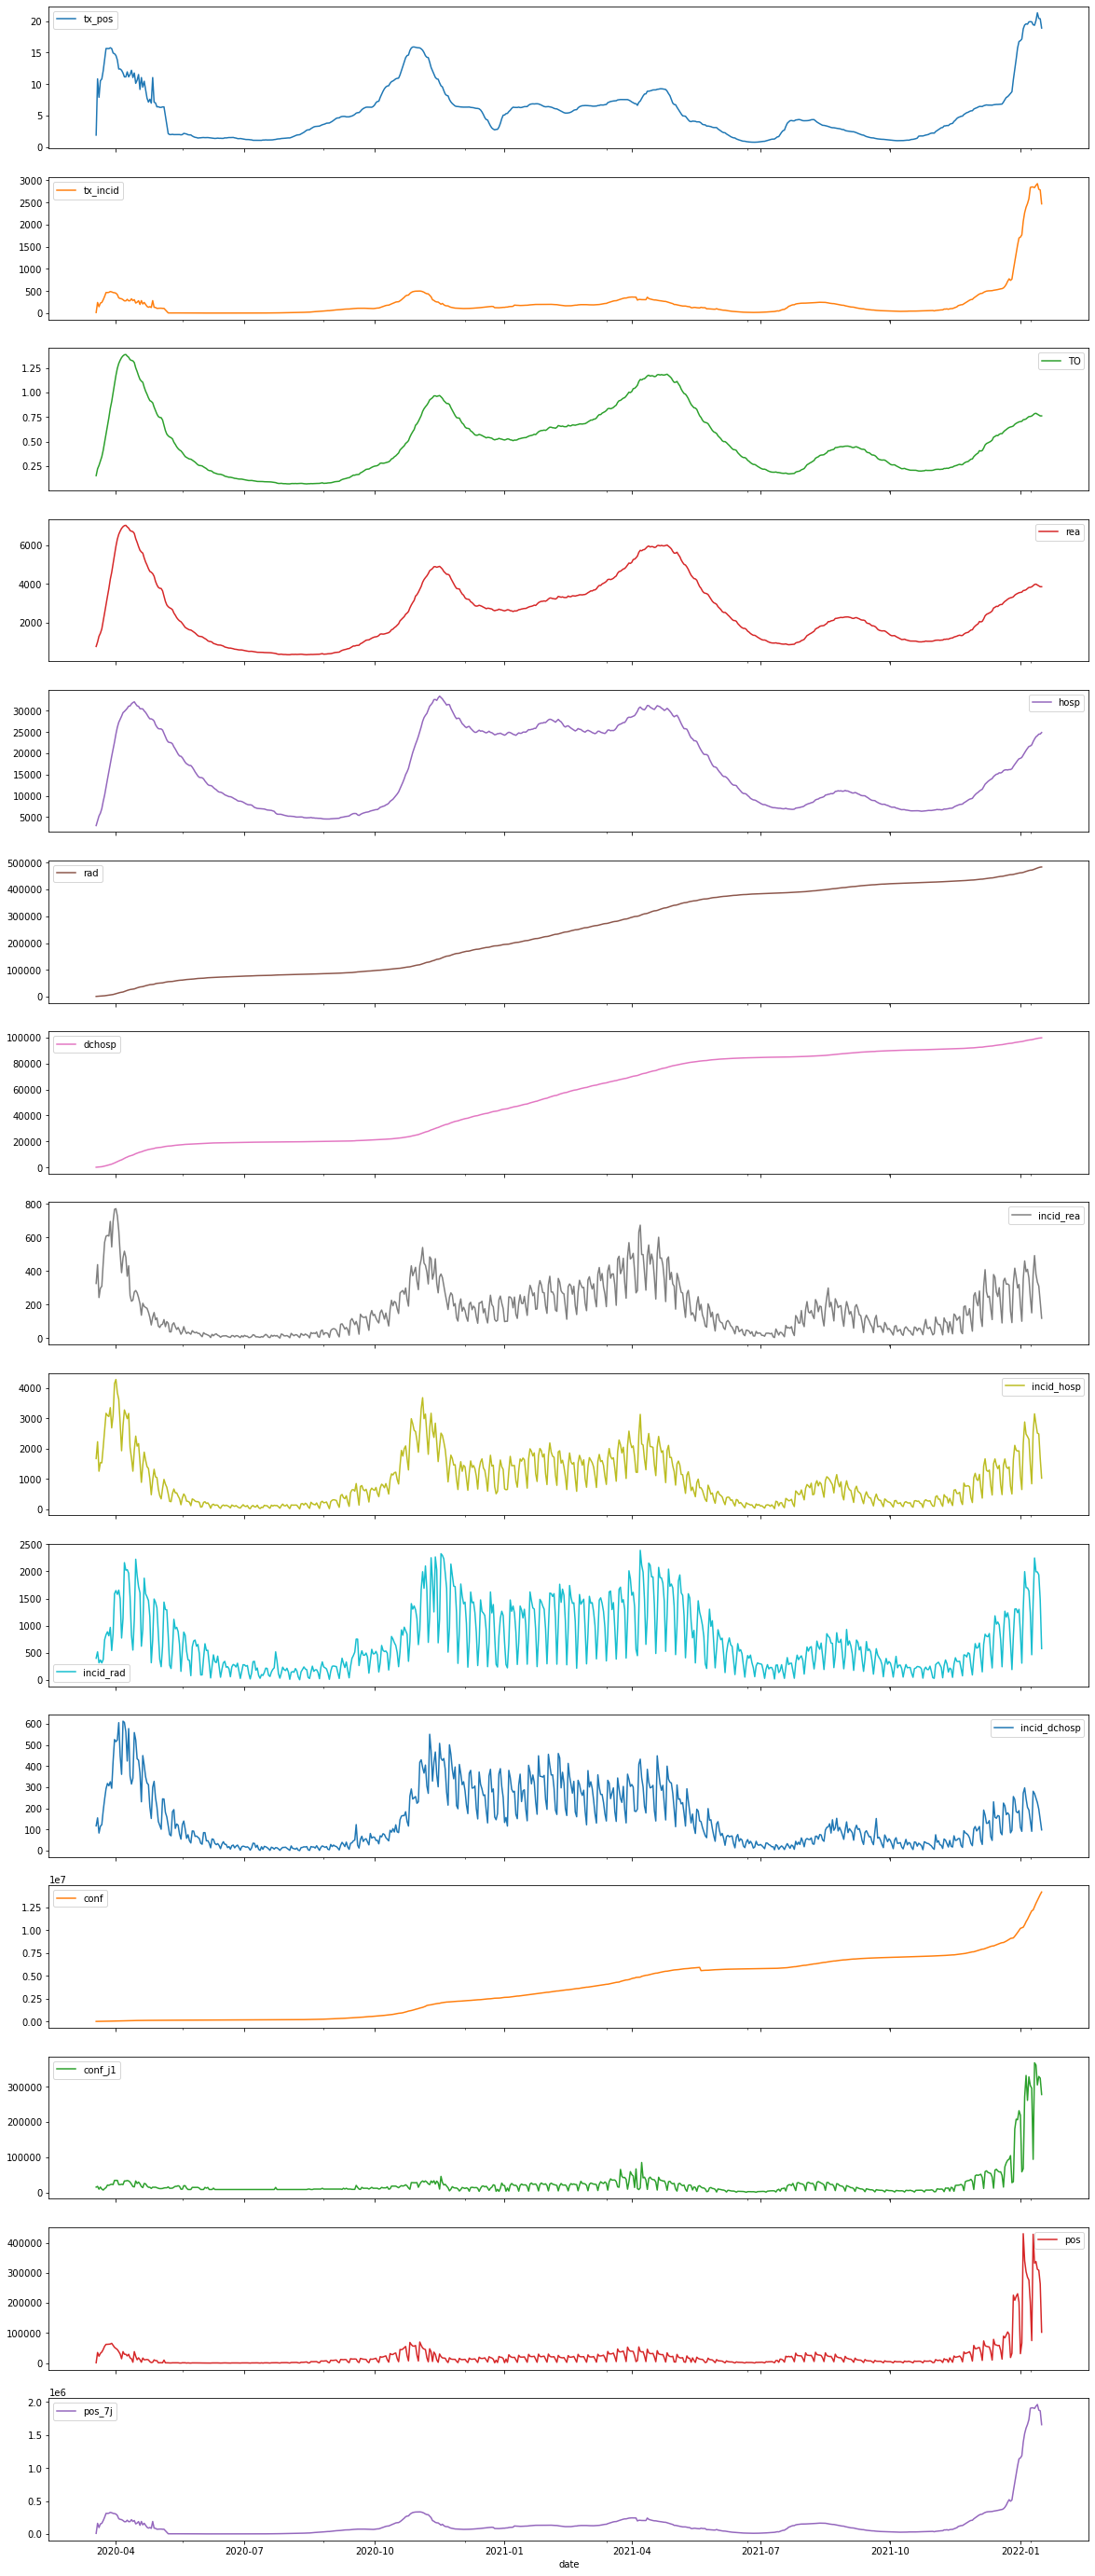

In [41]:
df.plot(subplots=True,figsize=(20,50))
#save the clean dataset
df.to_csv('dataset-fr.csv')